# Geographic Maps

In this reading, we'll learn how to use geopandas to manipulate and plot geographic data.  geopandas is based on regular pandas, so we'll be using GeoDataFrames and GeoSeries, which are types that inherit from the regular ones we have been using.

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 16

## Install

Before installing anything, make sure you are on version 19.0.0 or later of pip:

In [3]:
!pip3 --version

pip 21.0.1 from /home/tharter/.local/lib/python3.6/site-packages/pip (python 3.6)


If not, pip can upgrade itself with this:

```
pip3 install --upgrade pip
```

You can then install geopandas and some other packages it uses like this:

```
pip3 install geopandas shapely descartes geopy
```

Finally, you'll need to install rtree with `apt` to enable some features we'll learn:

```
sudo apt install -y python3-rtree
```

## Shapefiles

Shapefiles contain geographic infomation, such as coordinates of points, or regional boundaries.  There are many places you can find shapefiles online, such as here for census data (https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.html) and here for Madison data (https://data-cityofmadison.opendata.arcgis.com/search?tags=boundaries).

From the latter, we'll search for "Lakes and Rivers", then click "Download", then right-click "Shapefile" and "Copy Link Address".

`wget https://opendata.arcgis.com/datasets/c46082b091a941f8b2ded1dd115a1a05_8.zip -O lakes.zip`

That saves the shapefile as "lakes.zip".  Let's peek inside using `unzip -l`:

In [4]:
!unzip -l lakes.zip

Archive:  lakes.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
     9958  2021-03-10 14:14   Lakes_and_Rivers.dbf
  1222320  2021-03-10 14:14   Lakes_and_Rivers.shp
      145  2021-03-10 14:14   Lakes_and_Rivers.prj
     1612  2021-03-10 14:14   Lakes_and_Rivers.shx
        5  2021-03-10 14:14   Lakes_and_Rivers.cpg
---------                     -------
  1234040                     5 files


Shapefiles are really a collection of files, including a .shp.  Sometimes this collection of files is stored in a directory and sometimes in a zip.

`geopandas.read_file` knows how to read shapefiles.  You can pass either a directory name, or a zip name; if the latter, prefix it with "zip://":

In [5]:
import geopandas
df = geopandas.read_file("lakes.zip")
df.head()

OBJECTID    SHAPESTAre  SHAPESTLen  \
0         1  39958.447479  782.327754   
1         2  31880.854431  797.842450   
2         3   3699.958649  814.712984   
3         4   1174.258911  797.157265   
4         5  40693.432434  848.431555   

                                            geometry  
0  POLYGON ((-89.49887 43.08164, -89.49901 43.081...  
1  POLYGON ((-89.48482 43.08431, -89.48497 43.084...  
2  POLYGON ((-89.51718 43.10277, -89.51725 43.102...  
3  POLYGON ((-89.51869 43.10268, -89.51866 43.102...  
4  POLYGON ((-89.54302 43.10091, -89.54301 43.100...

We can see that we get back a GeoDataFrame, which (based on `__mro__`) is a descendent of the regular pandas DataFrame (meaning we can everything we can with regular DataFrames, and then some):

In [6]:
type(df)

geopandas.geodataframe.GeoDataFrame

In [7]:
type(df).__mro__

(geopandas.geodataframe.GeoDataFrame,
 geopandas.base.GeoPandasBase,
 pandas.core.frame.DataFrame,
 pandas.core.generic.NDFrame,
 pandas.core.base.PandasObject,
 pandas.core.accessor.DirNamesMixin,
 pandas.core.base.SelectionMixin,
 pandas.core.indexing.IndexingMixin,
 object)

GeoDataFrames contain a special GeoSeries column:

In [8]:
type(df["geometry"])

geopandas.geoseries.GeoSeries

Which in turn contains various shape objects (mostly polygons) from the shapely module we installed earlier:

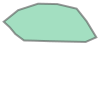

In [9]:
df.loc[0, "geometry"]

What is the index of the biggest shape?

In [10]:
biggest_idx = df["SHAPESTAre"].idxmax()
biggest_idx

131

What shape is that?

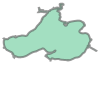

In [11]:
df.loc[biggest_idx, "geometry"]

Lake Mendota!

We can plot them all at once:

<AxesSubplot:>

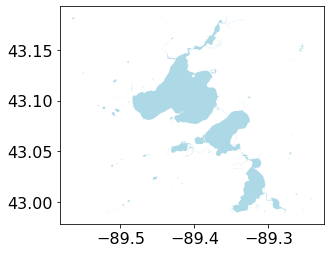

In [12]:
df.plot(color="lightblue")

In the map, the x-axis is longitude and the y-axis is latitude; these are degrees of an angle (out of 360).  This is the system used for GPS (https://en.wikipedia.org/wiki/Geographic_coordinate_system), but there are also other *coordinate reference systems* (CRS) available.

We can view the current .crs being used as well as try another one (many different coordinate systems are assigned an EPSG code: https://en.wikipedia.org/wiki/EPSG_Geodetic_Parameter_Dataset):

In [13]:
df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
df2 = df.to_crs("epsg:32616")
df2.head()

OBJECTID    SHAPESTAre  SHAPESTLen  \
0         1  39958.447479  782.327754   
1         2  31880.854431  797.842450   
2         3   3699.958649  814.712984   
3         4   1174.258911  797.157265   
4         5  40693.432434  848.431555   

                                            geometry  
0  POLYGON ((296586.503 4772912.001, 296575.468 4...  
1  POLYGON ((297739.320 4773174.340, 297726.376 4...  
2  POLYGON ((295166.302 4775303.433, 295160.970 4...  
3  POLYGON ((295043.161 4775296.300, 295045.784 4...  
4  POLYGON ((293057.855 4775159.268, 293057.962 4...

In [15]:
df2.crs

<Projected CRS: EPSG:32616>
Name: WGS 84 / UTM zone 16N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 90°W and 84°W, northern hemisphere between equator and 84°N, onshore and offshore. Belize. Canada - Manitoba; Nunavut; Ontario. Costa Rica. Cuba. Ecuador - Galapagos. El Salvador. Guatemala. Honduras. Mexico. Nicaragua. United States (USA).
- bounds: (-90.0, 0.0, -84.0, 84.0)
Coordinate Operation:
- name: UTM zone 16N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Notice that for `df.crs`, we are using a coordinate system based on degrees:
```
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
```

Whereas for `dfs2.crs`, we are using one based on meters:
```
- E[east]: Easting (metre)
- N[north]: Northing (metre)
```

One advantage of using a system based on meters instead of angles is that sizes and lengths are meaningful.

In [16]:
df.loc[biggest_idx, "geometry"].area # doesn't mean anything if we have angles

0.004444191930664349

In [17]:
sq_km = df2.loc[biggest_idx, "geometry"].area / 1e6
print(f"Lake Mendota is {sq_km} square km")

Lake Mendota is 40.196186737857346 square km


Wikipedia says it is 39.4 sq km (https://en.wikipedia.org/wiki/Lake_Mendota), so the latter is about right.

The disadvantage of a meter-based coordinate system is that we're effectively distorting earth to be flat.  This doesn't create too much error for a small region, but it doesn't work for the whole planet, so the meter-based CRS are only for specific regions.

There are a collection of `epsg:326??` and `epsg:327??` CRS for the northern and southern hemospheres, respectively.  The `??` represents one of 60 zones in the UTM system (https://en.wikipedia.org/wiki/Universal_Transverse_Mercator_coordinate_system).

Madison, WI is zone 16 of the northern hemosphere (see map here: https://en.wikipedia.org/wiki/Universal_Transverse_Mercator_coordinate_system#/media/File:Utm-zones-USA.svg), which is why we use `epsg:32616`.

If we plot using this CRS, we get x and y axes in meters, with the origin ("0,0" point) somewhere down and to the left of where we plotted the map.

Text(37.676161295510724, 0.5, 'y (meters)')

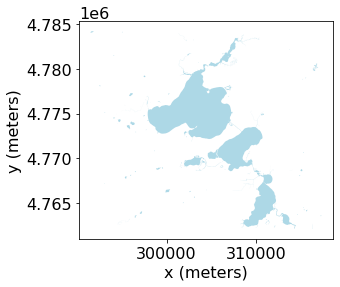

In [18]:
ax = df2.plot(color="lightblue")
ax.set_xlabel("x (meters)")
ax.set_ylabel("y (meters)")

## Plotting an Address

Let's plot a point for Bascom Hall on the map.  Where is it located?  *Geocoding* is the process of converting an address or name of a landmark to coordinates.  geopandas uses the `geopy` package we installed earlier for geocoding.  `geopy` can use different online services to do geocoding:

In [19]:
import geopy
geopy.geocoders.SERVICE_TO_GEOCODER

{'algolia': geopy.geocoders.algolia.AlgoliaPlaces,
 'arcgis': geopy.geocoders.arcgis.ArcGIS,
 'azure': geopy.geocoders.azure.AzureMaps,
 'baidu': geopy.geocoders.baidu.Baidu,
 'baiduv3': geopy.geocoders.baidu.BaiduV3,
 'banfrance': geopy.geocoders.banfrance.BANFrance,
 'bing': geopy.geocoders.bing.Bing,
 'databc': geopy.geocoders.databc.DataBC,
 'geocodeearth': geopy.geocoders.geocodeearth.GeocodeEarth,
 'geocodefarm': geopy.geocoders.geocodefarm.GeocodeFarm,
 'geonames': geopy.geocoders.geonames.GeoNames,
 'google': geopy.geocoders.googlev3.GoogleV3,
 'googlev3': geopy.geocoders.googlev3.GoogleV3,
 'geolake': geopy.geocoders.geolake.Geolake,
 'here': geopy.geocoders.here.Here,
 'ignfrance': geopy.geocoders.ignfrance.IGNFrance,
 'mapbox': geopy.geocoders.mapbox.MapBox,
 'mapquest': geopy.geocoders.mapquest.MapQuest,
 'maptiler': geopy.geocoders.maptiler.MapTiler,
 'nominatim': geopy.geocoders.nominatim.Nominatim,
 'opencage': geopy.geocoders.opencage.OpenCage,
 'openmapquest': geopy.ge

These services vary in terms of accuracy, cost, and rate limits.  Most want us to specify a `user_agent` so that the sites know a bit about who is using them.  Let's try looking up Bascom Hall with the default:

In [20]:
geopandas.tools.geocode("Bascom Hall", user_agent="cs320")

geometry                    address
0  POINT (-85.11864 30.92807)  Bascom, FL, United States

Oops, we want the Bascom Hall in Madison, WI, not the one in Florida.

In [21]:
geopandas.tools.geocode("Bascom Hall; Madison, WI", user_agent="cs320")

geometry                          address
0  POINT (-89.38326 43.04054)  Madison Town, WI, United States

Still not great.  Let's use the "nominatim" provider (which uses OpenStreetMaps).

In [22]:
bascom = geopandas.tools.geocode("Bascom Hall; Madison, WI", provider="nominatim", user_agent="cs320")
bascom

geometry  \
0  POINT (-89.40434 43.07536)   

                                             address  
0  Bascom Hall, 500, Lincoln Drive, Madison, Dane...

Great, let's plot that on top of our lakes.

<AxesSubplot:>

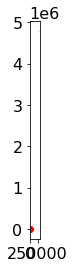

In [23]:
ax = df2.plot(color="lightblue")
bascom.plot(ax=ax, color="red")

Not good!  The problem is that the two GeoDataFrames are using different coordinate systems.

In [24]:
print(df2.crs.name)
print(bascom.crs.name)

WGS 84 / UTM zone 16N
WGS 84


Let's convert bascom to the one df2 is using.

In [25]:
bascom2 = bascom.to_crs(df2.crs)
print(df2.crs.name)
print(bascom2.crs.name)

WGS 84 / UTM zone 16N
WGS 84 / UTM zone 16N


<AxesSubplot:>

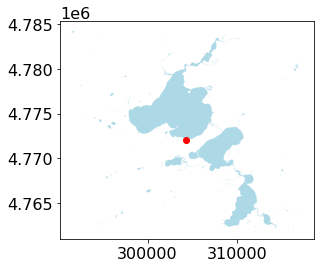

In [26]:
ax = df2.plot(color="lightblue")
bascom2.plot(ax=ax, color="red")

What if we want a particular radius around a point, say 1km?  Calling `.buffer` on a point (or a GeoSeries containing a point) creates a circle with a specified radius.  Actually, there is no circle type in shapely, so you just get a very roundish polygon or line with many sides.

In [27]:
bascom.to_crs(df2.crs).buffer(1000)

0    POLYGON ((305261.748 4771989.622, 305256.933 4...
dtype: geometry

We can add `.boundary` to the end of the above to get just a line around the circumference.

In [28]:
bascom.to_crs(df2.crs).buffer(1000).boundary

0    LINESTRING (305261.748 4771989.622, 305256.933...
dtype: geometry

<AxesSubplot:>

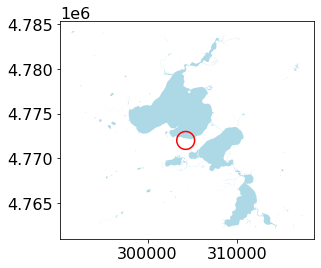

In [29]:
ax = df2.plot(color="lightblue")
bascom2.buffer(1000).boundary.plot(ax=ax, color="red")

Note that the order of (1) converting to a metric coordinate system and then (2) creating a buffer of a given radius is important.  If we try it in the other order, geopandas will complain with good reason: 1 degree of latitude is generally not the same distance as 1 degree of longitude, so we'll get a weird oval.

/home/tharter/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


<AxesSubplot:>

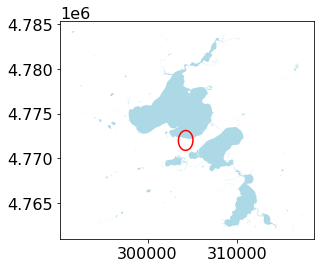

In [30]:
ax = df2.plot(color="lightblue")
bascom.buffer(0.01).to_crs(df2.crs).boundary.plot(ax=ax, color="red")

Going back to the correct example, we can pass `label="..."` and call `ax.legend()` if we want a legend for our annotations.

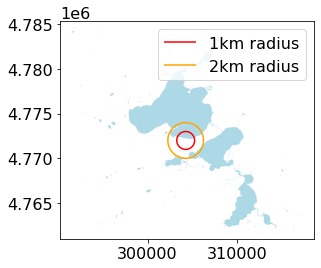

In [31]:
ax = df2.plot(color="lightblue")
bascom2.buffer(1000).boundary.plot(ax=ax, color="red", label="1km radius")
bascom2.buffer(2000).boundary.plot(ax=ax, color="orange", label="2km radius")
ax.legend()

Geopandas lets use create intersections and unions of GeoDataFrames with `geopandas.overlay(????, ????, how='intersection')` and `geopandas.overlay(????, ????, how='union')`.  If we put our circle around Bascom Hall in a GeoDataFrame with the same CRS as our lakes, we can identify/quantify all water within a 3km radius.

<AxesSubplot:>

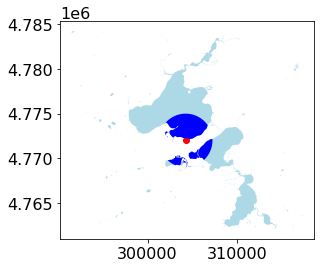

In [32]:
ax = df2.plot(color="lightblue")
bascom2.plot(ax=ax, color="red", label="Bascom Hall")
circle = geopandas.GeoDataFrame({"geometry": bascom2.buffer(3000)}, crs=df2.crs)
nearby_water = geopandas.overlay(circle, df2, how='intersection')
nearby_water.plot(ax=ax, color="blue")

Just asking for the area tells us the individual area of each piece:

In [33]:
nearby_water.area

0    5.640684e+04
1    4.348284e+03
2    1.535014e+03
3    2.907417e+06
4    9.419778e+06
5    6.626681e+03
6    7.762981e+03
7    3.973467e+03
8    1.108547e+06
dtype: float64

We could sum those parts, or get the `unary_union`, which converts it all to a single shape a (`MultiPolygon`).

In [34]:
print(type(nearby_water.unary_union))
print(f"There are {nearby_water.unary_union.area / 1e6} sq km of water within 3 km of Bascom Hall")

<class 'shapely.geometry.multipolygon.MultiPolygon'>
There are 13.516395362225174 sq km of water within 3 km of Bascom Hall


# Conclusion

geopandas gives us DataFrames where each row is a shape.  We can use these like regular DataFrames, but we can also directly plot geographic maps.  If we want a world map, we may want to use latitude/longitude, but converting to a meter-based coordinate system makes it easier to compute distances, areas, and radiuses around a point.  GeoPandas makes it easy to intersect and union various shapes.